# Tfldf

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Charger les données
df = pd.read_csv('train 2.csv')
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27475,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27476,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27477,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27478,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [3]:
# Filtrer les tweets positifs et négatifs
df_filtered = df[df['sentiment'].isin(['positive', 'negative'])]

# Calculer les pourcentages
sentiment_percentages = df_filtered['sentiment'].value_counts(normalize=True) * 100

print("Pourcentage de tweets par sentiment:")
print(sentiment_percentages)


Pourcentage de tweets par sentiment:
sentiment
positive    52.447595
negative    47.552405
Name: proportion, dtype: float64


In [4]:
# Préparation des données pour le modèle
X = df_filtered['text']
y = df_filtered['sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=32)

# TF-IDF Vectorization
tfidf = TfidfVectorizer()
X_train_CV = tfidf.fit_transform(X_train)
X_test_CV = tfidf.transform(X_test)

print("\nDimensions de X_test_CV:", X_test_CV.shape)
print("Nombre d'éléments stockés:", X_test_CV.nnz)


Dimensions de X_test_CV: (4091, 15806)
Nombre d'éléments stockés: 44633


In [5]:
# Entraînement de la régression logistique
lr = LogisticRegression()
lr.fit(X_train_CV, y_train)

# Scores
train_score = lr.score(X_train_CV, y_train)
test_score = lr.score(X_test_CV, y_test)

print("Score sur l'ensemble d'entraînement:", round(train_score, 3))
print("Score sur l'ensemble de test:", round(test_score, 3))

Score sur l'ensemble d'entraînement: 0.932
Score sur l'ensemble de test: 0.873


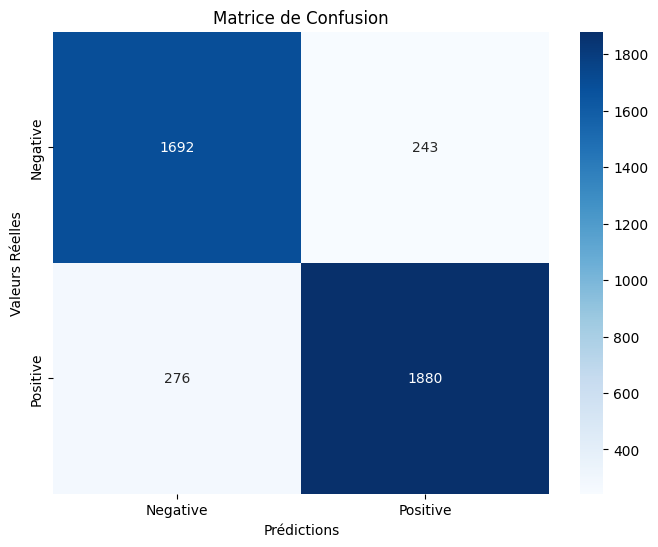

In [6]:
# Visualisation de la matrice de confusion
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Prédictions
y_pred = lr.predict(X_test_CV)

# Création de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Visualisation
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Matrice de Confusion')
plt.ylabel('Valeurs Réelles')
plt.xlabel('Prédictions')
plt.show()

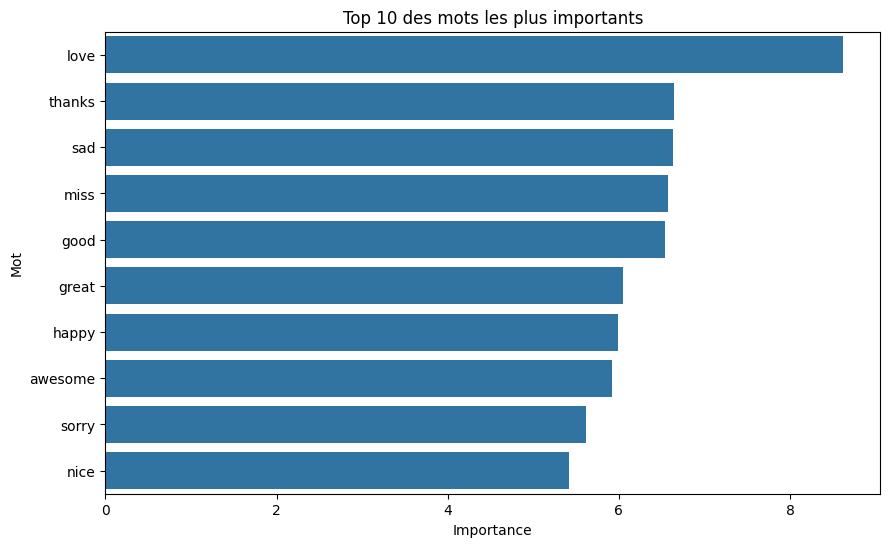

In [7]:
# Visualisation des mots les plus importants
feature_importance = pd.DataFrame({
    'word': tfidf.get_feature_names_out(),
    'importance': abs(lr.coef_[0])
})

top_features = feature_importance.nlargest(10, 'importance')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x='importance', y='word')
plt.title('Top 10 des mots les plus importants')
plt.xlabel('Importance')
plt.ylabel('Mot')
plt.show()